(Text(0.5, 1.0, 'Detected Point'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

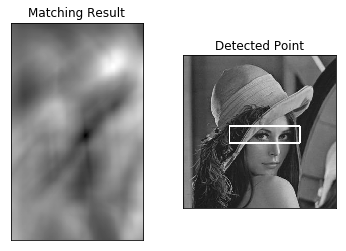

In [2]:
%matplotlib inline
#15.1 模板匹配基础
#使用函数cv2.matchTemplate()进行模板匹配，method=cv2.TM_SQDIFF
import cv2
import numpy as np
from matplotlib import pyplot as plt
img=cv2.imread("lena.jpg",0)
template=cv2.imread("lena_eyes.jpg",0)
th,tw=template.shape[::]
rv=cv2.matchTemplate(img,template,cv2.TM_SQDIFF)
minVal,maxVal,minLoc,maxLoc=cv2.minMaxLoc(rv)
topleft=minLoc      #值最小匹配度最好
bottomRight=(topleft[0]+tw,topleft[1]+th)
cv2.rectangle(img,topleft,bottomRight,255,2)
plt.subplot(121)
plt.imshow(rv,cmap="gray")
plt.title("Matching Result"),plt.xticks([]),plt.yticks([])
plt.subplot(122)
plt.imshow(img,cmap="gray")
plt.title("Detected Point"),plt.xticks([]),plt.yticks([])

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

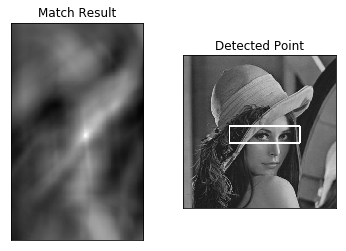

In [3]:
#使用函数cv2.matchTemplate()进行模板匹配，method=cv2.TM_CCOEFF
import cv2
import numpy as np
from matplotlib import pyplot as plt
img=cv2.imread("lena.jpg",0)
template=cv2.imread("lena_eyes.jpg",0)
th,tw=template.shape[::]
rv=cv2.matchTemplate(img,template,cv2.TM_CCOEFF)
minVal,maxVal,minLoc,maxLoc=cv2.minMaxLoc(rv)
topleft=maxLoc       #值最大匹配度最好
bottomRight=(topleft[0]+tw,topleft[1]+th)
cv2.rectangle(img,topleft,bottomRight,255,2)
plt.subplot(121)
plt.imshow(rv,cmap="gray")
plt.title("Match Result")
plt.xticks([]),plt.yticks([])
plt.subplot(122)
plt.imshow(img,cmap="gray")
plt.title("Detected Point")
plt.xticks([]),plt.yticks([])

In [4]:
#15.2 多模板匹配
import numpy as np
am=np.array([[3,6,8,77,66],[12,88,3,9,8],[11,2,67,5,2]])
print(am)
b=np.where(am>5)
for i in zip(*b):
    print(i)
print(am[::-1])  #实现行列位置的互换

[[ 3  6  8 77 66]
 [12 88  3  9  8]
 [11  2 67  5  2]]
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(1, 0)
(1, 1)
(1, 3)
(1, 4)
(2, 0)
(2, 2)
[[11  2 67  5  2]
 [12 88  3  9  8]
 [ 3  6  8 77 66]]


(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

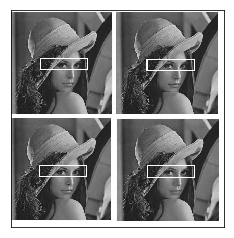

In [5]:
#使用模板匹配方式，标记在输入图像内匹配的多个子集图像
import cv2
import numpy as np
from matplotlib import pyplot as plt
img=cv2.imread("lena_muti.jpg",0)
template=cv2.imread("lena_eyes.jpg",0)
w,h=template.shape[::-1]
res=cv2.matchTemplate(img,template,cv2.TM_CCOEFF_NORMED)
threshold=0.9
loc=np.where(res>=threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img,pt,(pt[0]+w,pt[1]+h),255,1)
plt.imshow(img,cmap="gray")
plt.xticks([]),plt.yticks([])